In [19]:
#from google.colab import drive
#drive.mount('/content/drive')

In [20]:
#

In [1]:
!pwd

/home/hyuksu/projects/ml/bootcampdeeplearning


### 목표
- 강아지,고양이 이미지을 배열로 변환
   - 압축된 형식의 배열로 저장:npz(넘파이 라이브러리에서 읽고 쓸 수 있는 바이너리 파일)
   - 대용량 데이터를 압축형태로 정리해두면 클라우드 환경에 쉽게 업로드,다운로드 가능.
   - 저장소의 공간 적게 차지(공간 사용 효율 좋아짐)

In [22]:
# 바이너리 파일: 컴퓨터가 읽을 수 있게 이진수로 내용을 저장한 파일
# npz: 배열 파일 여러개를 하나의 파일에 묶어서 저장(압축)

In [23]:
#1.압축 풀저 해제
#2. 이미지 한장씩 접근
#3. 이미지 크기 조정
#4. 배열로 변환
#5. 모든 이미지를 npz형식으로 저장

In [5]:
# 라이브러리 불러오기
from zipfile import ZipFile #zip 압축파일(.zip)을 읽고 쓰기 위한 기능
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image


In [6]:
zip_path='/home/hyuksu/projects/ml/bootcampdeeplearning/data/cats_and_dogs_filtered.zip'

with ZipFile(zip_path,'r') as zf:
  #사용 할 파일을 r 읽기모드로 열기
  zf.extractall(path='/home/hyuksu/projects/ml/bootcampdeeplearning/data/cat_dog') # 지정한 경로로 압축 해제


In [7]:
# train-cats,dog
# test-cats,dog
#총 4개의 폴더 경로를 변수에 저장
train_cats_dir='/home/hyuksu/projects/ml/bootcampdeeplearning/data/cat_dog/cats_and_dogs_filtered/train/cats'
train_dogs_dir='/home/hyuksu/projects/ml/bootcampdeeplearning/data/cat_dog/cats_and_dogs_filtered/train/dogs'

test_cats_dir='/home/hyuksu/projects/ml/bootcampdeeplearning/data/cat_dog/cats_and_dogs_filtered/test/cats'
test_dogs_dir='/home/hyuksu/projects/ml/bootcampdeeplearning/data/cat_dog/cats_and_dogs_filtered/test/dogs'
# 각 폴더에 있는 이미지 파일명 접근
# os.listdir(폴더경로):해당경로에있는 파일명을 리스트로 출력
train_cats_fn=os.listdir(train_cats_dir)
train_dogs_fn=os.listdir(train_dogs_dir)

test_cats_fn=os.listdir(test_cats_dir)
test_dogs_fn=os.listdir(test_dogs_dir)
# 각각의 이미지 파일이 몇개씩 들어있는지 개수확인

In [8]:

print(len(test_cats_fn),len(test_dogs_fn))
print(len(train_cats_fn),len(train_dogs_fn))

500 500
1000 1000


In [9]:
#이미지 1장을 크기로 조정후 arr변환
# train cat
# train_cats_fn[0] 사용

tmp_path=os.path.join(train_cats_dir,train_cats_fn[0])
tmp_path
# train_cats_dir: 폴더 경로
# train_cats_fn[0]: 첫번제 고양이 사진 이름
img=Image.open(tmp_path).resize((224,224))
img_arr=np.array(img)
img_arr.shape


(224, 224, 3)

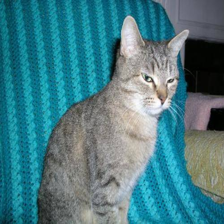

In [10]:
img

In [11]:
img_arr
# train(고양이) 데이터의 0번 인덱스 사진을 불러와서 배열로 변환

array([[[ 30,  94, 112],
        [ 11,  95, 107],
        [ 14, 110, 119],
        ...,
        [ 69,  71,  83],
        [ 68,  71,  79],
        [ 67,  70,  77]],

       [[ 21,  89, 106],
        [  7,  94, 106],
        [ 21, 118, 127],
        ...,
        [ 70,  72,  83],
        [ 69,  72,  80],
        [ 67,  70,  77]],

       [[  0,  77,  90],
        [  4,  94, 106],
        [ 10, 106, 117],
        ...,
        [ 70,  73,  84],
        [ 70,  73,  81],
        [ 68,  71,  78]],

       ...,

       [[ 10,  66,  80],
        [ 14,  63,  75],
        [  7,  46,  58],
        ...,
        [  8,  92, 112],
        [  1,  73, 100],
        [  4,  75, 103]],

       [[ 13,  69,  83],
        [ 14,  62,  75],
        [  4,  43,  55],
        ...,
        [ 12,  98, 117],
        [  2,  79, 104],
        [  5,  80, 106]],

       [[ 10,  66,  80],
        [  5,  54,  66],
        [  9,  48,  60],
        ...,
        [  5,  93, 112],
        [  7,  87, 112],
        [  8,  84, 111]]

In [12]:
# 모든데이터를 배열로 저장해보자
# train_cat/ train_dog/test_cat/test_cat
import tqdm
def prepro_img(path,element):
  empty=[]

  for i in tqdm(element):
    tmp_path=os.path.join(path,i)
    img=Image.open(tmp_path).resize((224,224))
    img_arr=np.array(img)
    empty.append(img_arr)
  return np.array(empty)




In [13]:
from tqdm import tqdm

In [14]:
train_cats= prepro_img(train_cats_dir,train_cats_fn)
train_dogs= prepro_img(train_dogs_dir,train_dogs_fn)
test_cats= prepro_img(test_cats_dir,test_cats_fn)
test_dogs= prepro_img(test_dogs_dir,test_dogs_fn)

100%|██████████| 500/500 [00:00<00:00, 555.71it/s]


In [15]:
# 크기 확인 (배열 크기 확인)
print(f'train_cats:{train_cats.shape}')
print(f'train_dogs:{train_dogs.shape}')
print(f'test_cats:{test_cats.shape}')
print(f'test_dogs:{test_dogs.shape}')


train_cats:(1000, 224, 224, 3)
train_dogs:(1000, 224, 224, 3)
test_cats:(500, 224, 224, 3)
test_dogs:(500, 224, 224, 3)


In [16]:
train_cats_t=[0]*len(train_cats_fn)
train_dogs_t=[1]*len(train_dogs_fn)
test_cats_t=[0]*len(test_cats_fn)
test_dogs_t=[1]*len(test_dogs_fn)


In [17]:
# 두개의 배열을 병합하는 함수
import numpy as np
a=np.array([[1,2],[3,4]])
b=np.array([[5,6],[7,8]])
c=np.concatenate((a,b),axis=0)
print(a.shape,b.shape,c.shape)
print(c)

(2, 2) (2, 2) (4, 2)
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [18]:
train_x=np.concatenate((train_cats,train_dogs),axis=0)
train_y=np.concatenate((train_cats_t,train_dogs_t),axis=0)
test_x=np.concatenate((test_cats,test_dogs),axis=0)
test_y=np.concatenate((test_cats_t,test_dogs_t),axis=0)
print(train_x.shape,test_x.shape)
print(train_y.shape,train_y.shape)
#여러개 파일을  압축하여 하나의 .npz 파일로 저장하는함수

np.savez_compressed('./data/cat_vs_dogs',X_train=train_x,X_test=test_x,Y_trainn=train_y,Y_test=test_y)

(2000, 224, 224, 3) (1000, 224, 224, 3)
(2000,) (2000,)


In [19]:
import numpy as np
np.random.seed(42)
num1=np.arange(0,2000)
num2=np.arange(0,1000)
suffle_train=np.random.shuffle(num1)
suffle_test=np.random.shuffle(num2)
train_x_s=train_x[suffle_train]
